# Ecuación de difusión en 1-D

La ecuación de difusión unidimensional está dada por:
    
$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

La derivada de segundo orden se puede representar geométricamente como la línea tangente a la curva dada por la primera derivada. Discretizaremos la derivada de segundo orden con un esquema de Diferencia Central: una combinación de Diferencia hacia adelante y Diferencia hacia atrás de la primera derivada. Considere la expansión de Taylor de $ u_{i + 1} $ y $ u_{i-1} $ alrededor de $ u_i $:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

Si sumamos estas dos expansiones, puede ver que los términos de las derivadas impares se cancelarán entre sí. Si descuidamos cualquier término de $ O (\Delta x ^ 4) $ o superior (y en realidad, esos son muy pequeños), entonces podemos reorganizar la suma de estas dos expansiones para resolver nuestra segunda derivada.

$$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$$
Así,
$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^4)$$

Así, reemplazando en la ecuación de Difusión

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Como antes, notamos que una vez que tenemos una condición inicial, la única incógnita es $ u_ {i} ^ {n + 1} $, por lo que reorganizamos la ecuación resolviendo nuestra incógnita:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$


In [1]:
import numpy as np                    
import matplotlib.pyplot as plt 
import time, sys                   
%matplotlib inline

# Retomemos las funciones para el dato inicial.

In [2]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #el número de pasos de tiempo que queremos calcular
nu = 0.3   #el valor de viscocidad
sigma = .2 
dt = sigma * dx**2 / nu #note la diferencia... 
x=np.arange(0.0,2+dx,dx)

In [3]:
dt*nt #es el tiempo final, al terminar la iteración 

0.03333333333333335

In [8]:
def f1(nx):
    #dx = 2 / (nx-1)
    u = np.ones(nx)      #numpy función ones()
    u[int(.5 / dx):int(1 / dx + 1)] = 2  #configurar u = 2 entre 0.5 y 1 y u = 1 para todo lo demás según nuestra CI
    #print(u)
    return u

def f2(nx):
    #dx = 2 / (nx-1)
    L=2
    n=4
    Fi=0.2#ángulo de fase temporal
    c=10 #velocidad de la onda
    A=0.5#amplitud máxima, relacionada con la intensidad del sonido
    t=0.18 #instantánea en el tiempo t segundos
    x=np.arange(0.0,L+dx,dx)
    u=A*np.sin(n*np.pi*c*0.005*t/L+Fi)*np.sin(n*np.pi*x/L)#aquí definimos la función
    return u

def mostrar_imagen(u):
    plt.plot(np.linspace(0, 2, nx), u);

# Discretizamos la ecuación de Difusión ED

In [6]:
def ED(u):
    for n in range(nt):  #iterando en el tiempo
        un = u.copy() 
        for i in range(1, nx - 1): #iterando en el espacio
            u[i]  # quien debe ir aquí 
    return u

In [7]:
# Ejecute la ED para f1

In [9]:
# ahora, ejecute la ED para f2

In [ ]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #el número de pasos de tiempo que queremos calcular
nu = 0.3   #el valor de viscocidad
sigma = .2 
dt = sigma * dx**2 / nu #note la diferencia... 
x=np.arange(0.0,2+dx,dx)

plt.figure(figsize=(18,12))
#como colocar un título general a un paquete 

plt.subplot(2, 2, 1) 
plt.plot(x,f1(nx),label=f' Velocidad inicial para f1')
plt.legend(frameon=False)
plt.subplot(2, 2, 2) 
plt.plot(x,ED(f1(nx)),label=f'Vel en t=0.5 para f1')
plt.legend(frameon=False)
plt.subplot(2, 2, 3) 
plt.plot(x,f2(nx),label=f' Velocidad inicial para f2')
plt.legend(frameon=False)
plt.subplot(2, 2, 4) 
plt.plot(x,ED(f2(nx)),label=f'Vel en t=0.5 para f2')
plt.legend(frameon=False)
plt.show()

# Ecuación de Burgers

La ecuación de Burgues (EB) en una dimensión espacial, es una combinación de la ecuación de convección no lineal y la ecuación de difusión. Vamos a detenernos y estudiar un poco esta ecuación por lo sorprendente que es y lo mucho que podemos aprender de esta pequeña ecaución.

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$
 
 Usando los pasos realizados en la discretización de la ECnL y la ED obtenemos:
 
 $$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

De donde,

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$
 


Para examinar algunas propiedades interesantes de la ecuación de Burgers, es útil usar diferentes condiciones iniciales y de contorno de las que hemos estado usando para los pasos anteriores.

Nuestra condición inicial para este problema será:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

Cuya solución analítica es dada por( Usando el método de separación de variables)
\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Además, usaremos una condición de frontera (problema tipo Neumann)

$$u(0) = u(2\pi).$$


La condición inicial que estamos usando para la ecuación de Burgers puede ser un poco difícil de evaluar a mano. La derivada $\frac{\partial \phi}{\partial x}$ no es demasiado difícil, pero sería fácil dejar caer un signo u olvidar un factor de $ x $ en alguna parte, así que vamos a usar SymPy para ayudarnos.

# [SymPy](http://sympy.org/en/)


SymPy es la biblioteca matemática simbólica de Python. Tiene muchas de las mismas funciones matemáticas simbólicas que Mathematica con el beneficio adicional de que podemos traducir fácilmente sus resultados a nuestros cálculos de Python (también es gratuito y de código abierto).

In [9]:
import sympy
from sympy import init_printing
init_printing(use_latex=True) #salidas renderizadas usando Latex

Comience configurando variables simbólicas para las tres variables en nuestra condición inicial y luego escriba la ecuación completa para $ \phi $. Deberíamos obtener una versión bien renderizada de nuestra ecuación $ \phi $.

In [ ]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

In [ ]:
phiprima = phi.diff(x)
phiprima

In [ ]:
print(phiprima)

Ahora que tenemos la versión Pythonic de nuestra derivada, podemos terminar de escribir la ecuación de la condición inicial completa y luego traducirla a una expresión Python utilizable. Para esto, usaremos la función *lambdify*, que toma una ecuación simbólica SymPy y la convierte en una función invocable.

In [ ]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprima / phi) + 4
print(u)

## Lambdify
Para lambdify esta expresión en una función utilizable, le decimos a lambdify qué variables solicitar y la función a la que queremos conectarlas.

In [ ]:
ufunc = lambdify((t, x, nu), u)
print(ufunc(1, 4, 3))

Ahora que tenemos configuradas las condiciones iniciales, podemos continuar y terminar de configurar el problema. Podemos generar la gráfica de la condición inicial usando nuestra función lambdify

In [ ]:
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu
x = np.linspace(0, 2 * np.pi, nx)
def f3(t):
    x = np.linspace(0, 2 * np.pi, nx)
    un = np.empty(nx)
    u = np.asarray([ufunc(t, x0, nu) for x0 in x])
    return u
np.shape(f3(0))

In [ ]:
np.shape(x)

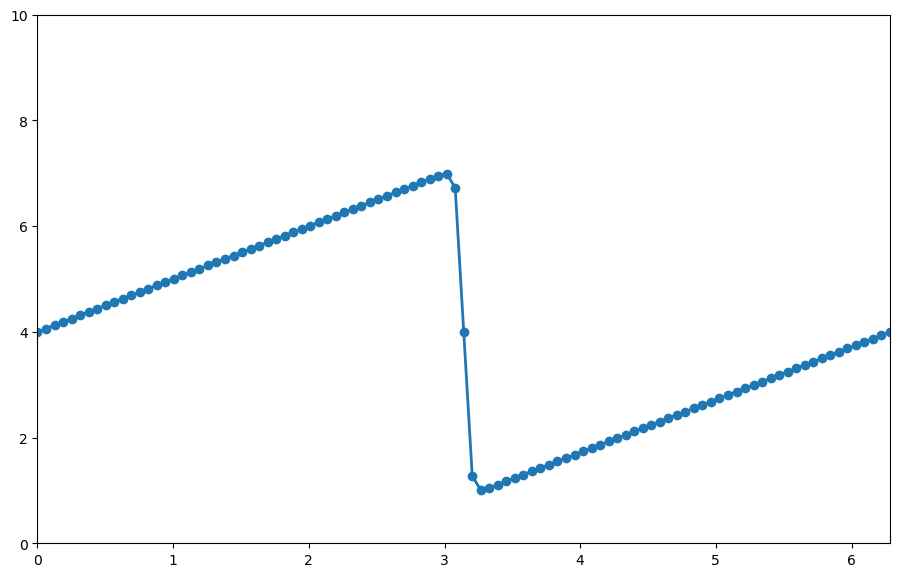

In [17]:
u = f3(0)
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

Definitivamente, esta no es la función de sombrero con la que hemos estado tratando hasta ahora. Lo llamamos "función de diente de sierra". Sigamos adelante y veamos qué sucede.

## Condiciones de frontera periódicas

Una de las grandes diferencias entre lo que habíamos hecho y este problema  es el uso de condiciones de contorno *periódicas*. Si experimenta un poco con los lo hecho antes y hace que la simulación se ejecute más tiempo (aumentando `nt`), notará que la onda seguirá moviéndose hacia la derecha hasta que ya ni siquiera aparezca en la gráfica.

Con condiciones de contorno periódicas, cuando un punto llega al lado derecho del marco, **se envuelve** de nuevo al frente del marco.

Recuerde la discretización que resolvimos
$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

¿Qué *significa* $ u_{i + 1} ^ n $  cuando $ i $ ya está al final del marco?

Piense en esto por un minuto antes de continuar.


In [18]:
u = f3(0) #Volvemos a crear la condición inicial 
def EB(u):
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx-1):
            u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
        u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
        u[-1] = u[0]
    return u  

In [ ]:
# ¿Cómo podemos calcular la solución teórica, u_analitica para poder compararla con la solución numérica?
#sol
#u_analitica

In [ ]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x,u, marker='o', lw=2, label='Inicial')
plt.plot(x,EB(u), marker='o', lw=2, label='Computacional')
plt.plot(x, u_analitica, label='Analítica')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend(frameon = False);

# Jugando un poco con los parametros



In [ ]:
nx = 101 # tome diferentes valores y si vale 501?
nt = 100 # tome diferentes valores y si vale 500?
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu
x = np.linspace(0, 2 * np.pi, nx)
u = f3(0) #Volvemos a crear la condición inicial
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x,u, marker='o', lw=2, label='Inicial')
plt.plot(x,EB(u), marker='o', lw=2, label='Computacional')
plt.plot(x, u_analytical, label='Analítica')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend(frameon = False);